## Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Data Reading I selected Albama state

In [1]:


cases_deaths=pd.read_csv("merged_cases_deaths.csv")

In [2]:
cases_deaths

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
1,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0
2,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0
3,0,Statewide Unallocated,AR,5,0,2020-07-01,706,0
4,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0
...,...,...,...,...,...,...,...,...
587507,56037,Sweetwater County,WY,56,42343,2020-12-31,2966,16
587508,56039,Teton County,WY,56,23464,2020-12-31,2138,4
587509,56041,Uinta County,WY,56,20226,2020-12-31,1558,7
587510,56043,Washakie County,WY,56,7805,2020-12-31,781,19


## top 5  counties with highest number of cases

In [104]:

selected_state = 'AL'


state_data = cases_deaths[(cases_deaths['State'] == selected_state) & (cases_deaths['date'] >= '2020-06-01') & (cases_deaths['date'] <= '2021-01-03')]


top_counties = state_data.groupby('County Name')['cases'].max().nlargest(5).index

# plt.figure(figsize=(12, 8))
# plt.title(f"COVID-19 Trends in {selected_state} and Top 5 Counties")

In [8]:
print(top_counties)

Index(['Jefferson County ', 'Mobile County ', 'Madison County ',
       'Tuscaloosa County ', 'Montgomery County '],
      dtype='object', name='County Name')



## Top five counties (['Jefferson County ', 'Mobile County ', 'Madison County ',
   ##    'Tuscaloosa County ', 'Montgomery County '],


In [11]:
# single_county = top_counties[0]


# county_data = state_data[state_data['County Name'] == single_county]

## AL state with top five counties

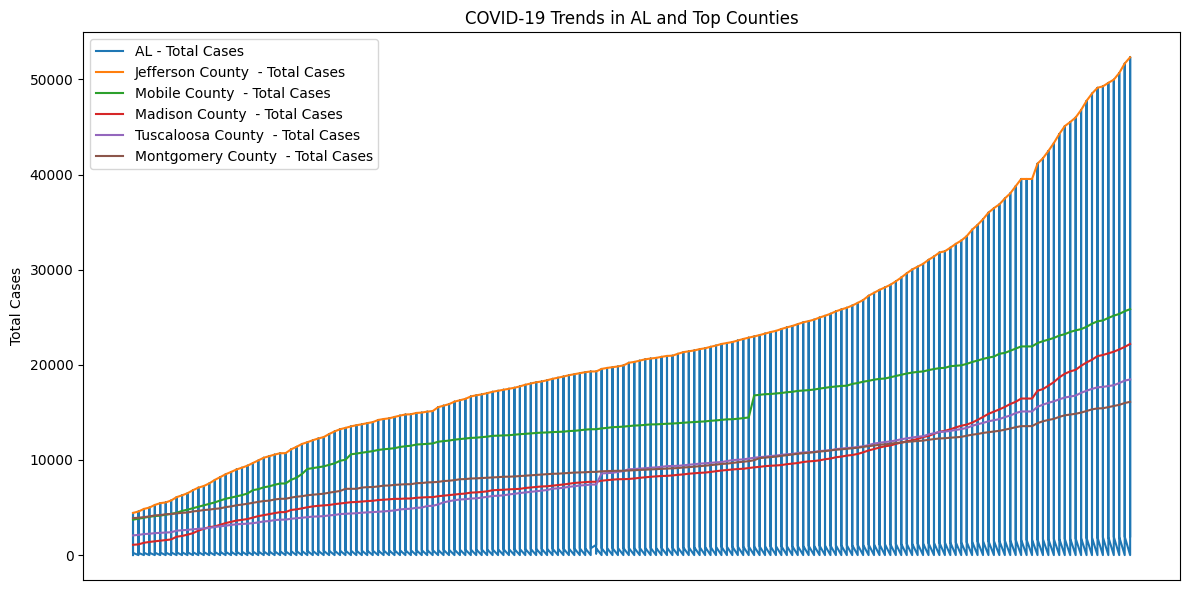

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
cases_deaths = pd.read_csv("merged_cases_deaths.csv")

selected_state = 'AL'
state_data = cases_deaths[(cases_deaths['State'] == selected_state) & 
                          (cases_deaths['date'] >= '2020-06-01') & 
                          (cases_deaths['date'] <= '2021-01-03')]
top_counties = state_data.groupby('County Name')['cases'].max().nlargest(5).index

plt.figure(figsize=(12, 6))
plt.plot(state_data['date'], state_data['cases'], label=f"{selected_state} - Total Cases")
for county in top_counties:
    county_data = state_data[state_data['County Name'] == county]
    plt.plot(county_data['date'], county_data['cases'], label=f"{county} - Total Cases")

plt.xlabel('Dates')  
plt.ylabel('Total Cases')
plt.title(f"COVID-19 Trends in {selected_state} and Top Counties")
plt.legend()
plt.gca().axes.get_xaxis().set_visible(False)  
plt.tight_layout()
plt.show()


## Comparition diagram with RMSE

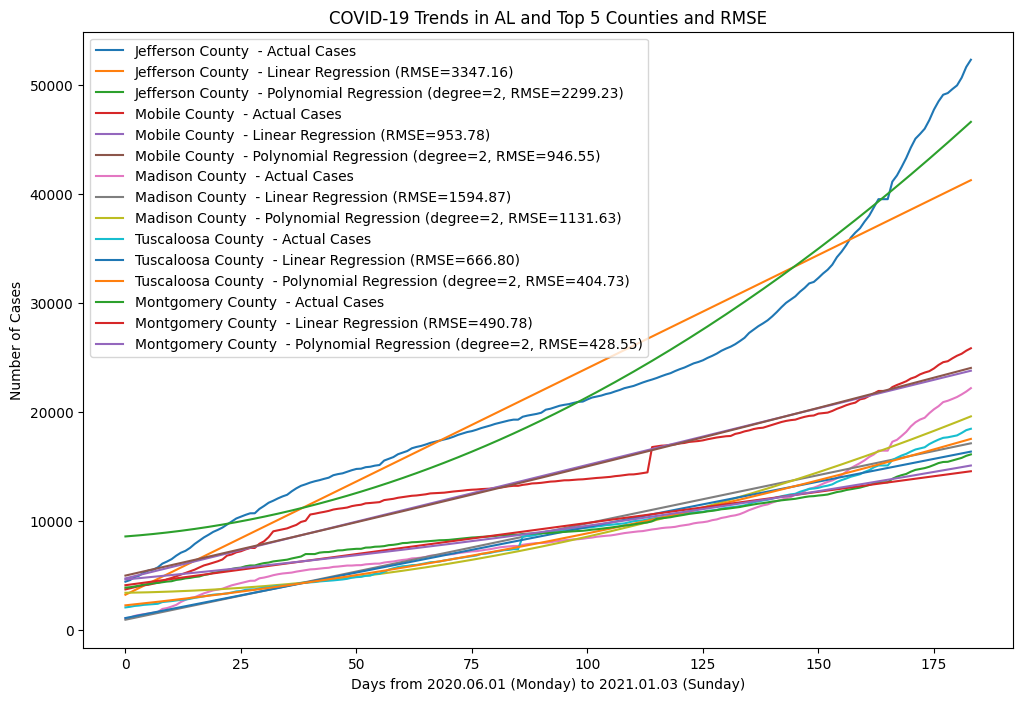

In [37]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

linear_reg = LinearRegression()

plt.figure(figsize=(12, 8))
plt.title(f"COVID-19 Trends in {selected_state} and Top 5 Counties and RMSE")

# Iterate over top counties
for county in top_counties:
    county_data = state_data[state_data['County Name'] == county]

  
    X = np.arange(len(county_data)).reshape(-1, 1)
    y_cases = county_data['cases']

# Linear Regression
    linear_reg.fit(X, y_cases)
    linear_pred_cases = linear_reg.predict(X)

# Polynomial Regression
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(X)
    
    poly_linear_reg = LinearRegression()
    poly_linear_reg.fit(X_poly, y_cases)
    poly_pred_cases = poly_linear_reg.predict(X_poly)


    rmse_linear = np.sqrt(mean_squared_error(y_cases, linear_pred_cases))
    rmse_poly = np.sqrt(mean_squared_error(y_cases, poly_pred_cases))

   
    plt.plot(X, y_cases, label=f"{county} - Actual Cases")
    plt.plot(X, linear_pred_cases, label=f"{county} - Linear Regression (RMSE={rmse_linear:.2f})")
    plt.plot(X, poly_pred_cases, label=f"{county} - Polynomial Regression (degree=2, RMSE={rmse_poly:.2f})")


plt.xlabel("Days from 2020.06.01 (Monday) to 2021.01.03 (Sunday)")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

In [107]:
# # Check availability of state and county data within the specified date range
# state_data = cases_deaths[
#     (cases_deaths['State'] == selected_state) & 
#     (cases_deaths['date'] >= '2020-06-01') & 
#     (cases_deaths['date'] <= '2021-01-03')
# ]

# # Check if any data is missing for the selected state
# missing_state_data = state_data.isnull().sum()
# print("Missing data in state data:\n", missing_state_data)

# # Check missing data in each county
# for county in top_counties:
#     county_data = state_data[state_data['County Name'] == county]
#     missing_county_data = county_data.isnull().sum()
#     print(f"Missing data in {county}:\n", missing_county_data)
# Check the length of state_data
print("Length of state data:", len(state_data))

# Check if X and y contain valid data
X = np.arange(len(county_data)).reshape(-1, 1)
y_cases = county_data['cases']

print("X shape:", X.shape)
print("y_cases shape:", y_cases.shape)



Length of state data: 12512
X shape: (184, 1)
y_cases shape: (184,)


## From above graph we can know that Jefferson County is in high risk

## Linear and Non-Linear (polynomial with degree n) regression models to compare trends

## for degree 2

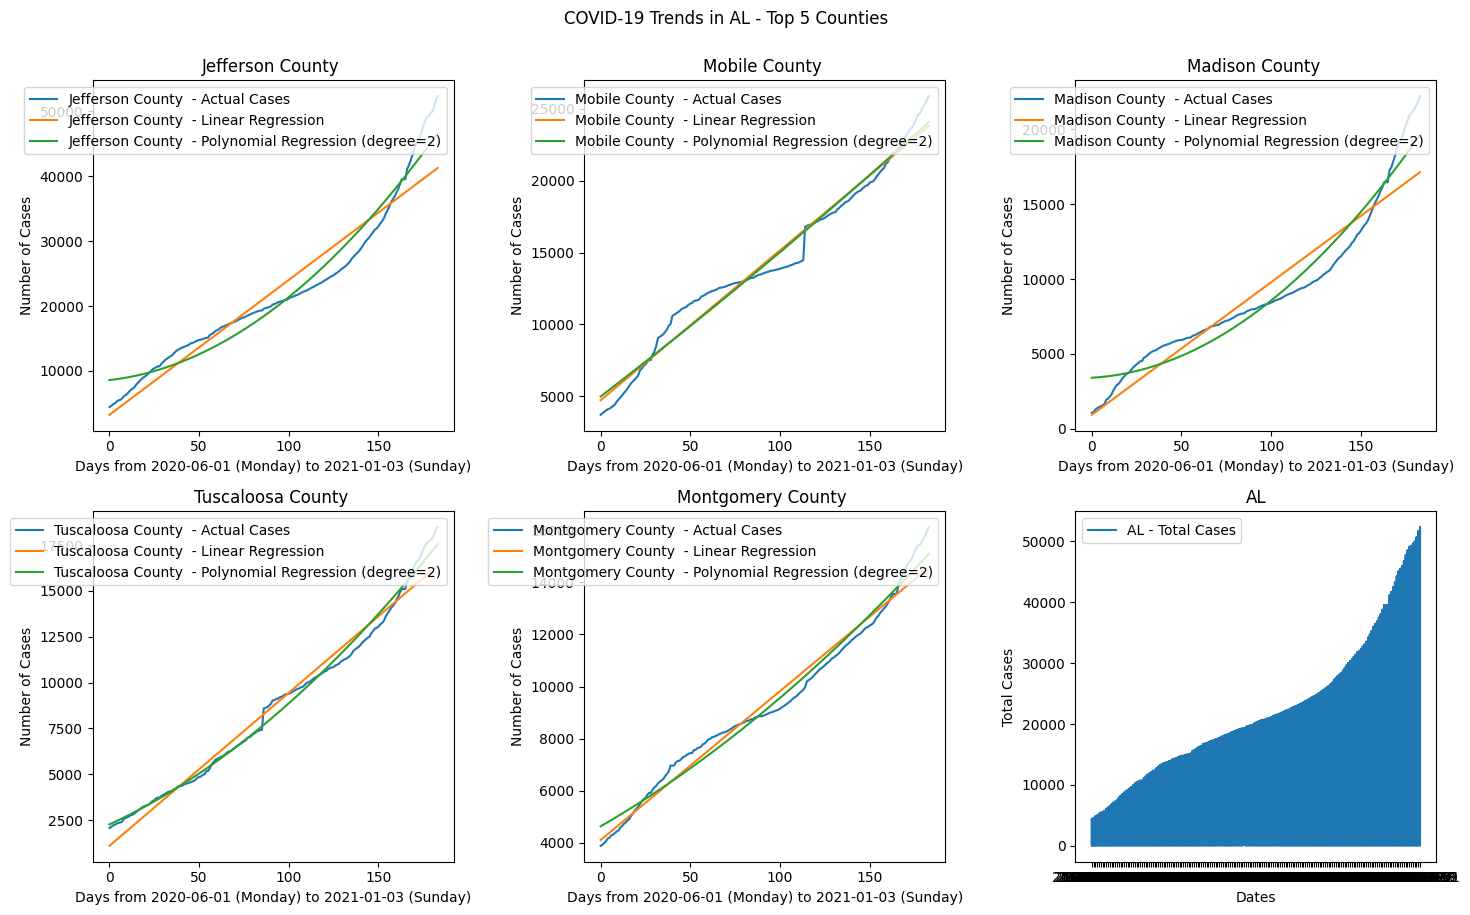

In [119]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
cases_deaths = pd.read_csv("merged_cases_deaths.csv")
selected_state = 'AL'
state_data = cases_deaths[(cases_deaths['State'] == selected_state) & 
                          (cases_deaths['date'] >= '2020-06-01') & 
                          (cases_deaths['date'] <= '2021-01-03')]
top_counties = state_data.groupby('County Name')['cases'].max().nlargest(5).index
linear_reg = LinearRegression()
plt.figure(figsize=(15, 10))
plt.suptitle(f"COVID-19 Trends in {selected_state} - Top 5 Counties", y=0.94)
plt.subplot(2, 3, 6)
plt.plot(state_data['date'], state_data['cases'], label=f"{selected_state} - Total Cases")
plt.xlabel('Dates')
plt.ylabel('Total Cases')
plt.title(f"{selected_state}")
plt.legend()

for i, county in enumerate(top_counties, 1):
    plt.subplot(2, 3, i)

    county_data = state_data[state_data['County Name'] == county]
    X = np.arange(len(county_data)).reshape(-1, 1)
    y_cases = county_data['cases']

    # Linear Regression
    linear_reg.fit(X, y_cases)
    linear_pred_cases = linear_reg.predict(X)

    # Polynomial Regression
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(X)
    poly_linear_reg = LinearRegression()
    poly_linear_reg.fit(X_poly, y_cases)
    poly_pred_cases = poly_linear_reg.predict(X_poly)

    plt.plot(X, y_cases, label=f"{county} - Actual Cases")
    plt.plot(X, linear_pred_cases, label=f"{county} - Linear Regression")
    plt.plot(X, poly_pred_cases, label=f"{county} - Polynomial Regression (degree=2)")

    plt.xlabel("Days from 2020-06-01 (Monday) to 2021-01-03 (Sunday)")
    plt.ylabel("Number of Cases")
    plt.title(f"{county}")
    plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.94])
plt.show()


## (degree=3)

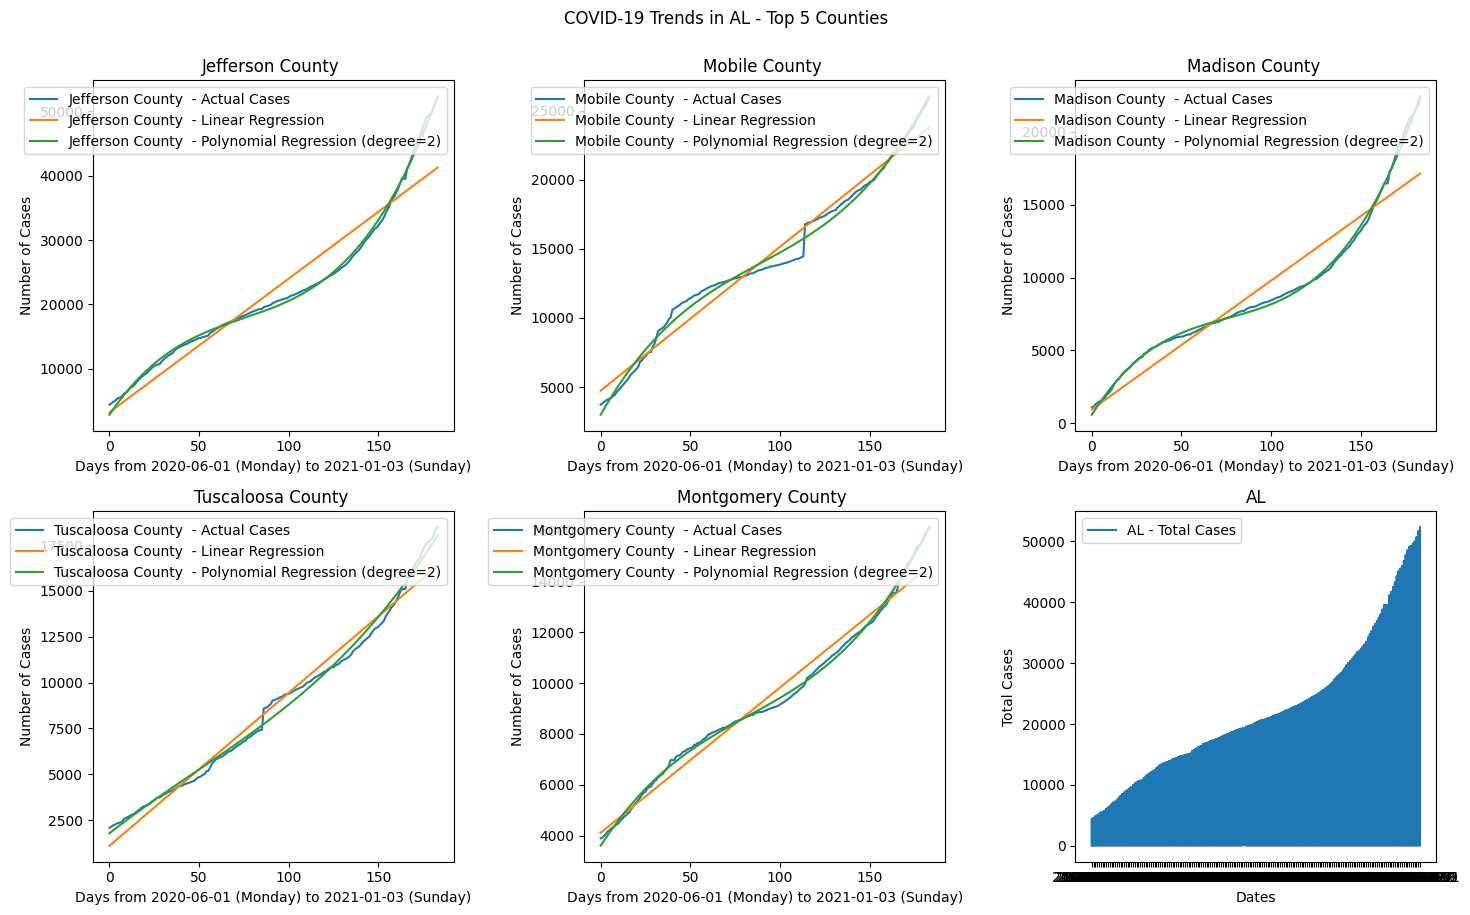

In [120]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
cases_deaths = pd.read_csv("merged_cases_deaths.csv")
selected_state = 'AL'
state_data = cases_deaths[(cases_deaths['State'] == selected_state) & 
                          (cases_deaths['date'] >= '2020-06-01') & 
                          (cases_deaths['date'] <= '2021-01-03')]
top_counties = state_data.groupby('County Name')['cases'].max().nlargest(5).index
linear_reg = LinearRegression()
plt.figure(figsize=(15, 10))
plt.suptitle(f"COVID-19 Trends in {selected_state} - Top 5 Counties", y=0.94)
plt.subplot(2, 3, 6)
plt.plot(state_data['date'], state_data['cases'], label=f"{selected_state} - Total Cases")
plt.xlabel('Dates')
plt.ylabel('Total Cases')
plt.title(f"{selected_state}")
plt.legend()

for i, county in enumerate(top_counties, 1):
    plt.subplot(2, 3, i)

    county_data = state_data[state_data['County Name'] == county]
    X = np.arange(len(county_data)).reshape(-1, 1)
    y_cases = county_data['cases']

    # Linear Regression
    linear_reg.fit(X, y_cases)
    linear_pred_cases = linear_reg.predict(X)

    # Polynomial Regression
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(X)
    poly_linear_reg = LinearRegression()
    poly_linear_reg.fit(X_poly, y_cases)
    poly_pred_cases = poly_linear_reg.predict(X_poly)

    plt.plot(X, y_cases, label=f"{county} - Actual Cases")
    plt.plot(X, linear_pred_cases, label=f"{county} - Linear Regression")
    plt.plot(X, poly_pred_cases, label=f"{county} - Polynomial Regression (degree=2)")

    plt.xlabel("Days from 2020-06-01 (Monday) to 2021-01-03 (Sunday)")
    plt.ylabel("Number of Cases")
    plt.title(f"{county}")
    plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.94])
plt.show()


## error using RMSE

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

selected_state = 'AL'
start_date = '2020-06-01'
end_date = '2021-01-03'
state_data = cases_deaths[(cases_deaths['State'] == selected_state) & 
                          (cases_deaths['date'] >= start_date) & 
                          (cases_deaths['date'] <= end_date)]

top_counties = state_data.groupby('County Name')['cases'].max().nlargest(5).index

linear_reg = LinearRegression()

for county in top_counties:
  
    county_data = state_data[state_data['County Name'] == county]
    X = np.arange(len(county_data)).reshape(-1, 1)
    y_cases = county_data['cases']

# Linear Regression
    linear_reg.fit(X, y_cases)
    linear_pred_cases = linear_reg.predict(X)
    rmse_linear = np.sqrt(mean_squared_error(y_cases, linear_pred_cases))

# Polynomial Regression (degree=2)
    poly_reg_2 = PolynomialFeatures(degree=2)
    X_poly_2 = poly_reg_2.fit_transform(X)

    poly_linear_reg_2 = LinearRegression()
    poly_linear_reg_2.fit(X_poly_2, y_cases)
    poly_pred_cases_2 = poly_linear_reg_2.predict(X_poly_2)
    rmse_poly_2 = np.sqrt(mean_squared_error(y_cases, poly_pred_cases_2))

# Polynomial Regression (degree=3)
    poly_reg_3 = PolynomialFeatures(degree=3)
    X_poly_3 = poly_reg_3.fit_transform(X)

    poly_linear_reg_3 = LinearRegression()
    poly_linear_reg_3.fit(X_poly_3, y_cases)
    poly_pred_cases_3 = poly_linear_reg_3.predict(X_poly_3)
    rmse_poly_3 = np.sqrt(mean_squared_error(y_cases, poly_pred_cases_3))

    print(f"{county} - Linear Regression (RMSE): {rmse_linear:.2f}")
    print(f"{county} - Polynomial Regression (degree=2, RMSE): {rmse_poly_2:.2f}")
    print(f"{county} - Polynomial Regression (degree=3, RMSE): {rmse_poly_3:.2f}")
    print()


Jefferson County  - Linear Regression (RMSE): 3347.16
Jefferson County  - Polynomial Regression (degree=2, RMSE): 2299.23
Jefferson County  - Polynomial Regression (degree=3, RMSE): 525.32

Mobile County  - Linear Regression (RMSE): 953.78
Mobile County  - Polynomial Regression (degree=2, RMSE): 946.55
Mobile County  - Polynomial Regression (degree=3, RMSE): 532.25

Madison County  - Linear Regression (RMSE): 1594.87
Madison County  - Polynomial Regression (degree=2, RMSE): 1131.63
Madison County  - Polynomial Regression (degree=3, RMSE): 217.46

Tuscaloosa County  - Linear Regression (RMSE): 666.80
Tuscaloosa County  - Polynomial Regression (degree=2, RMSE): 404.73
Tuscaloosa County  - Polynomial Regression (degree=3, RMSE): 358.12

Montgomery County  - Linear Regression (RMSE): 490.78
Montgomery County  - Polynomial Regression (degree=2, RMSE): 428.55
Montgomery County  - Polynomial Regression (degree=3, RMSE): 137.82



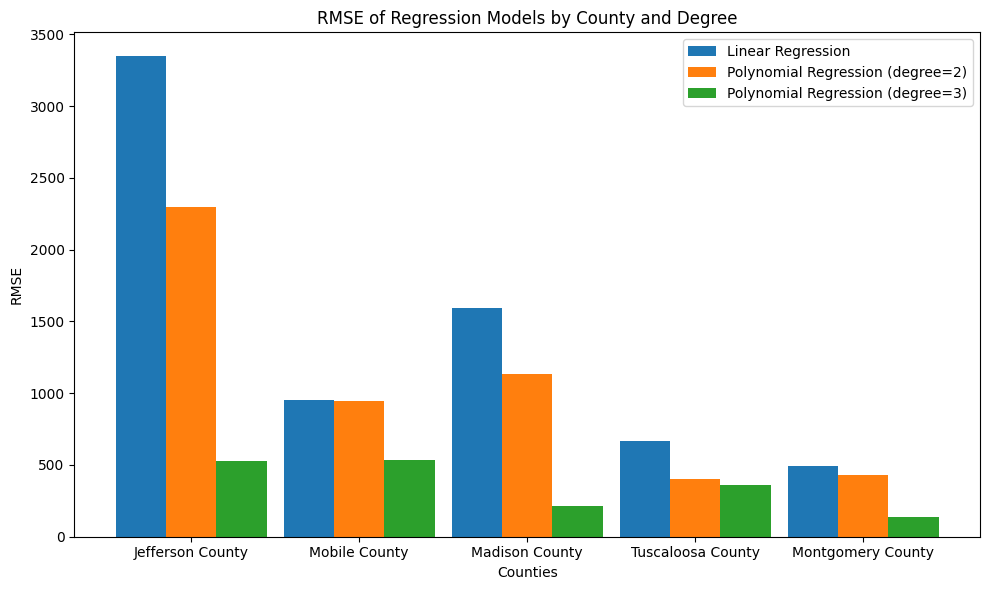

In [121]:
counties = ['Jefferson County', 'Mobile County', 'Madison County', 'Tuscaloosa County', 'Montgomery County']

linear_RMSE = [3347.16, 953.78, 1594.87, 666.80, 490.78]
deg2_RMSE = [2299.23, 946.55, 1131.63, 404.73, 428.55]
deg3_RMSE = [525.32, 532.25, 217.46, 358.12, 137.82]

x = np.arange(len(counties))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, linear_RMSE, width, label='Linear Regression')
bars2 = ax.bar(x, deg2_RMSE, width, label='Polynomial Regression (degree=2)')
bars3 = ax.bar(x + width, deg3_RMSE, width, label='Polynomial Regression (degree=3)')

ax.set_xlabel('Counties')
ax.set_ylabel('RMSE')
ax.set_title('RMSE of Regression Models by County and Degree')
ax.set_xticks(x)
ax.set_xticklabels(counties)
ax.legend()

plt.tight_layout()
plt.show()


Jefferson County:

Linear Regression (RMSE): 3347.16,
Polynomial Regression (degree=2, RMSE): 2299.23, 
Polynomial Regression (degree=3, RMSE): 525.32,
The Polynomial Regression with degree=3 has the lowest RMSE, suggesting it provides the best fit to the data among the three models.

Mobile County:

Linear Regression (RMSE): 953.78,
Polynomial Regression (degree=2, RMSE): 946.55,
Polynomial Regression (degree=3, RMSE): 532.25,
Similar to Jefferson County, the Polynomial Regression with degree=3 has the lowest RMSE, indicating the best fit.

Madison County:

Linear Regression (RMSE): 1594.87,
Polynomial Regression (degree=2, RMSE): 1131.63,
Polynomial Regression (degree=3, RMSE): 217.46,
The Polynomial Regression with degree=3 has significantly lower RMSE than the other models, suggesting a better fit.

Tuscaloosa County:

Linear Regression (RMSE): 666.80,
Polynomial Regression (degree=2, RMSE): 404.73,
Polynomial Regression (degree=3, RMSE): 358.12,
The Polynomial Regression with degree=3 has the lowest RMSE, indicating a better fit.

Montgomery County:

Linear Regression (RMSE): 490.78,
Polynomial Regression (degree=2, RMSE): 428.55,
Polynomial Regression (degree=3, RMSE): 137.82,
The Polynomial Regression with degree=3 has the lowest RMSE, suggesting the best fit.

## From above trend line i observed that Jefferson County is in high risk,because the cases were sudden peak in the middle days and by the end the cases were increased a lot

Trendfor Jefferson: The number of COVID-19 cases in Jefferson County has been steadily increasing. The Polynomial Regression with degree=3 indicates that the rate of increase is not constant, showing a more nuanced trend over time.

Trend: Mobile County has experienced a consistent rise in COVID-19 cases. The Polynomial 

Trend: Madison County has seen an upward trend in COVID-19 cases. The Polynomial Regression with degree=3 indicates that the rate of increase has been more pronounced, potentially signifying periods of accelerated spread.

Trend: Tuscaloosa County shows a consistent increase in COVID-19 cases. The Polynomial Regression with degree=3 suggests a steady rise with some fluctuations, capturing nuances in the growth pattern.

Trend: Montgomery County has witnessed an overall increase in COVID-19 cases. The Polynomial Regression with degree=3 indicates a relatively smoother upward trend, potentially reflecting a more controlled spread compared to other counties.

In [60]:
enrichment_data = pd.read_csv('emp.csv')
#enrichment_data 
import pandas as pd

employment = pd.read_csv('emp.csv')

selected_data = employment[employment['St Name'] == 'Alabama'][['St Name', 'October Employment', 'November Employment', 'December Employment']]

print(selected_data)

      St Name  October Employment  November Employment  December Employment
18    Alabama             1931745              1943477              1947237
19    Alabama               57111                55637                56026
20    Alabama               97602                97905                97909
21    Alabama              208688               209833               210009
22    Alabama             1568344              1580102              1583293
...       ...                 ...                  ...                  ...
1186  Alabama                5622                 5600                 5630
1187  Alabama                   0                    0                    0
1188  Alabama                   0                    0                    0
1189  Alabama                   0                    0                    0
1190  Alabama                1562                 1446                 1396

[1173 rows x 4 columns]


C:\Users\annem\AppData\Local\Temp\ipykernel_19720\681415361.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  enrichment_data = pd.read_csv('emp.csv')
C:\Users\annem\AppData\Local\Temp\ipykernel_19720\681415361.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  employment = pd.read_csv('emp.csv')


## Perform hypothesis tests 


Hypotheses:
Null Hypothesis (H0): There is no significant relationship between overall employment numbers and COVID-19 case numbers or the rate of increase.

Alternative Hypothesis (H1): There is a significant relationship between overall employment numbers and COVID-19 case numbers or the rate of increase.

Two-Tail - Two Sample t-test:

Objective: To determine if there is a significant difference between the mean COVID-19 cases in areas with higher employment and areas with lower employment.
Null Hypothesis (H0): There is no significant difference in mean COVID-19 cases between the two groups.
Alternative Hypothesis (H1): There is a significant difference in mean COVID-19 cases between the two groups.
The result of this test will indicate whether there is evidence to reject the null hypothesis and accept the alternative hypothesis that there is a significant difference.

One-Tail - Two Sample t-test:

Objective: To determine if the mean COVID-19 cases in areas with higher employment are significantly higher than the mean in areas with lower employment.
Null Hypothesis (H0): The mean COVID-19 cases in areas with higher employment is not significantly higher than the mean in areas with lower employment.
Alternative Hypothesis (H1): The mean COVID-19 cases in areas with higher employment is significantly higher than the mean in areas with lower employment.

## October Employment hypothesis

In [44]:
employment_threshold = enrichment_data['October Employment'].quantile(0.75)


In [46]:
print(employment_threshold)

5025.0


In [47]:
import pandas as pd
from scipy.stats import ttest_ind
covid_data = pd.read_csv('merged_cases_deaths.csv')
enrichment_data = pd.read_csv('emp.csv')

merged_data = pd.merge(covid_data, enrichment_data, how='inner', left_on=['State'], right_on=['St Name'])

employment_variable = 'October Employment'
covid_cases_variable = 'cases'  

employment_threshold = 5025.0

group_high_employment = merged_data[merged_data[employment_variable] >= employment_threshold][covid_cases_variable]
group_low_employment = merged_data[merged_data[employment_variable] < employment_threshold][covid_cases_variable]

t_stat, p_value_two_tail = ttest_ind(group_high_employment, group_low_employment, equal_var=False)


p_value_one_tail = p_value_two_tail / 2

alpha = 0.05
if p_value_two_tail < alpha:
    print("Reject the null hypothesis. There is a significant difference in COVID-19 cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in COVID-19 cases.")

if p_value_one_tail < alpha:
    print("Reject the null hypothesis. There is a higher mean in the group with higher employment.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a higher mean in the group with higher employment.")


Fail to reject the null hypothesis. There is no significant difference in COVID-19 cases.
Fail to reject the null hypothesis. There is no evidence of a higher mean in the group with higher employment.


C:\Users\annem\AppData\Local\Temp\ipykernel_19720\3382407214.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  enrichment_data = pd.read_csv('emp.csv')


In [56]:
enrichment_data

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,Industry,Status Code,Establishment Count,October Employment,November Employment,December Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2020,4,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,10697552,140824498,141390186,141000256,2455746836976,1339,1.00,1.00
1,US000,US,0.0,1,10,2020,4,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,61344,2979117,2897791,2908240,68960095962,1811,1.00,1.00
2,US000,US,0.0,2,10,2020,4,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,70121,4598026,4594771,4579493,77472817777,1298,1.00,1.00
3,US000,US,0.0,3,10,2020,4,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,171105,13794712,13885183,13778496,205557976780,1144,1.00,1.00
4,US000,US,0.0,5,10,2020,4,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,10394982,119452643,120012441,119734027,2103755946457,1352,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62755,C4974,NaN,NaN,5,1024,2020,4,MSA,NaN,"Yuma, AZ MSA",...,1024 Professional and business services,NaN,467,6535,6906,7245,87801077,979,0.67,0.52
62756,C4974,NaN,NaN,5,1025,2020,4,MSA,NaN,"Yuma, AZ MSA",...,1025 Education and health services,NaN,435,7625,7632,7804,126025569,1261,0.66,1.06
62757,C4974,NaN,NaN,5,1026,2020,4,MSA,NaN,"Yuma, AZ MSA",...,1026 Leisure and hospitality,NaN,329,5711,5870,5777,33908614,451,0.90,1.06
62758,C4974,NaN,NaN,5,1027,2020,4,MSA,NaN,"Yuma, AZ MSA",...,1027 Other services,NaN,214,1197,1218,1232,11823066,748,0.60,0.73


In [66]:
state_enrichment_data = employment[employment['St Name'] == 'Alabama']
state_enrichment_data

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,Industry,Status Code,Establishment Count,October Employment,November Employment,December Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
18,01000,01,0.0,0,10,2020,4,State,Alabama,Alabama -- Statewide,...,"10 Total, all industries",NaN,135331,1931745,1943477,1947237,27738838778,1099,1.00,1.00
19,01000,01,0.0,1,10,2020,4,State,Alabama,Alabama -- Statewide,...,"10 Total, all industries",NaN,1250,57111,55637,56026,1335541598,1826,1.39,1.71
20,01000,01,0.0,2,10,2020,4,State,Alabama,Alabama -- Statewide,...,"10 Total, all industries",NaN,1362,97602,97905,97909,1542144781,1213,1.55,1.76
21,01000,01,0.0,3,10,2020,4,State,Alabama,Alabama -- Statewide,...,"10 Total, all industries",NaN,3724,208688,209833,210009,2556193140,939,1.10,1.10
22,01000,01,0.0,5,10,2020,4,State,Alabama,Alabama -- Statewide,...,"10 Total, all industries",NaN,128995,1568344,1580102,1583293,22304959259,1088,0.96,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,01999,01,999.0,5,1023,2020,4,County,Alabama,"Unknown Or Undefined, Alabama",...,1023 Financial activities,NaN,1135,5622,5600,5630,120752281,1654,1.54,1.04
1187,01999,01,999.0,5,1024,2020,4,County,Alabama,"Unknown Or Undefined, Alabama",...,1024 Professional and business services,N,5432,0,0,0,0,0,0.00,0.00
1188,01999,01,999.0,5,1025,2020,4,County,Alabama,"Unknown Or Undefined, Alabama",...,1025 Education and health services,N,819,0,0,0,0,0,0.00,0.00
1189,01999,01,999.0,5,1026,2020,4,County,Alabama,"Unknown Or Undefined, Alabama",...,1026 Leisure and hospitality,N,189,0,0,0,0,0,0.00,0.00


In [68]:
print(state_covid_data.columns)


Index(['countyFIPS', 'County Name', 'State', 'StateFIPS', 'population', 'date',
       'cases', 'deaths', 'cases_per_100k'],
      dtype='object')


##  Hypothesis 1: Does higher overall employment lead to higher COVID cases?

In [86]:
import pandas as pd
from scipy.stats import ttest_ind
covid_data = pd.read_csv('merged_cases_deaths.csv')
enrichment_data = pd.read_csv('emp.csv')
merged_data = pd.merge(covid_data, enrichment_data, how='inner', left_on=['State'], right_on=['St Name'])
employment_variable = 'November Employment'
covid_cases_variable = 'cases'

# Set employment threshold
employment_threshold = 5025.0



group_high_employment = merged_data[merged_data[employment_variable] >= employment_threshold][covid_cases_variable]
group_low_employment = merged_data[merged_data[employment_variable] < employment_threshold][covid_cases_variable]

# Two-Tail - Two-Sample t-test
t_stat, p_value_two_tail = ttest_ind(group_high_employment, group_low_employment, equal_var=False)

# One-Tail - Two-Sample t-test (Higher Mean)
p_value_one_tail_higher = p_value_two_tail / 2

# One-Tail - Two-Sample t-test (Lower Mean)
p_value_one_tail_lower = p_value_two_tail / 2
alpha = 0.05

print("Hypothesis 1 - Overall Employment vs. COVID Cases:")
if p_value_two_tail < alpha:
    print("Reject the null hypothesis. There is a significant difference in COVID-19 cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in COVID-19 cases.")

if p_value_one_tail_higher < alpha:
    print("Reject the null hypothesis. There is a higher mean in the group with higher employment.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a higher mean in the group with higher employment.")

if p_value_one_tail_lower < alpha:
    print("Reject the null hypothesis. There is a lower mean in the group with higher employment.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a lower mean in the group with higher employment.")


Hypothesis 1 - Overall Employment vs. COVID Cases:
Fail to reject the null hypothesis. There is no significant difference in COVID-19 cases.
Fail to reject the null hypothesis. There is no evidence of a higher mean in the group with higher employment.
Fail to reject the null hypothesis. There is no evidence of a lower mean in the group with higher employment.


C:\Users\annem\AppData\Local\Temp\ipykernel_19720\2567538480.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  enrichment_data = pd.read_csv('emp.csv')


### Hypothesis 2: Does the change in employment in specific categories in Alabama between October and December influence the number of COVID cases?

In [89]:
import pandas as pd
from scipy.stats import ttest_ind

covid_data = pd.read_csv('merged_cases_deaths.csv')
enrichment_data = pd.read_csv('emp.csv')

merged_data = pd.merge(covid_data, enrichment_data, how='inner', left_on=['State'], right_on=['St Name'])
alabama_data = merged_data[merged_data['State'] == 'Alabama']

october_employment = alabama_data['October Employment']
december_employment = alabama_data['December Employment']
covid_cases = alabama_data['cases']

t_stat, p_value_two_tail = ttest_ind(october_employment, december_employment, equal_var=False)
alpha = 0.05
if p_value_two_tail < alpha:
    print("Reject the null hypothesis. There is a significant difference in employment.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in employment.")

p_value_one_tail = p_value_two_tail / 2

if p_value_one_tail < alpha:
    print("Reject the null hypothesis. There is a higher mean in December employment.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a higher mean in December employment.")


Fail to reject the null hypothesis. There is no significant difference in employment.
Fail to reject the null hypothesis. There is no evidence of a higher mean in December employment.


C:\Users\annem\AppData\Local\Temp\ipykernel_19720\415661541.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  enrichment_data = pd.read_csv('emp.csv')


## Hypothesis 3: Is there a significant difference in the mean of COVID cases between states with high and low December employment in Alabama?

In [90]:
import pandas as pd
from scipy.stats import ttest_ind
covid_data = pd.read_csv('merged_cases_deaths.csv')
enrichment_data = pd.read_csv('emp.csv')
merged_data = pd.merge(covid_data, enrichment_data, how='inner', left_on=['State'], right_on=['St Name'])
alabama_data = merged_data[merged_data['State'] == 'Alabama']
employment_variable = 'December Employment'
employment_threshold = 5025.0
group_high_employment = alabama_data[alabama_data[employment_variable] >= employment_threshold]['cases']
group_low_employment = alabama_data[alabama_data[employment_variable] < employment_threshold]['cases']
t_stat, p_value_two_tail = ttest_ind(group_high_employment, group_low_employment, equal_var=False)
alpha = 0.05
if p_value_two_tail < alpha:
    print("Reject the null hypothesis. There is a significant difference in COVID-19 cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in COVID-19 cases.")
p_value_one_tail = p_value_two_tail / 2

if p_value_one_tail < alpha:
    print("Reject the null hypothesis. There is a higher mean in the group with higher employment.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a higher mean in the group with higher employment.")


Fail to reject the null hypothesis. There is no significant difference in COVID-19 cases.
Fail to reject the null hypothesis. There is no evidence of a higher mean in the group with higher employment.


C:\Users\annem\AppData\Local\Temp\ipykernel_19720\2369459281.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  enrichment_data = pd.read_csv('emp.csv')


# All the hypothesis were failed, so by clearly we can say that their is no relation ship between employment and Covid cases

it suggests that there isn't sufficient evidence to conclude that there's a significant difference or correlation between the employment data and COVID-19 cases based on the provided datasets. This result implies that the variables (employment rates and COVID-19 cases) might not be significantly associated or impacted by each other in the manner tested in the hypotheses

## Perform the Chi-square test
The Chi-square test is a statistical method used to determine whether there is a significant association between categorical variables

In [94]:

print(employment_data.dtypes)
employment_data[['October Employment', 'November Employment', 'December Employment']] = employment_data[
    ['October Employment', 'November Employment', 'December Employment']
].apply(pd.to_numeric, errors='coerce')

print(employment_data.dtypes)




Area\nCode                                        object
St                                                object
Cnty                                             float64
Own                                                int64
NAICS                                              int64
Year                                               int64
Qtr                                                int64
Area Type                                         object
St Name                                           object
Area                                              object
Ownership                                         object
Industry                                          object
Status Code                                       object
Establishment Count                                int64
October Employment                                 int64
November Employment                                int64
December Employment                                int64
Total Quarterly Wages          

In [95]:

missing_values = employment_data.isnull().sum()
print(missing_values)
employment_data.fillna(0, inplace=True)  
missing_values = employment_data.isnull().sum()
print(missing_values)


Area\nCode                                           0
St                                                6706
Cnty                                              6706
Own                                                  0
NAICS                                                0
Year                                                 0
Qtr                                                  0
Area Type                                            0
St Name                                           6724
Area                                                 0
Ownership                                            0
Industry                                             0
Status Code                                      58480
Establishment Count                                  0
October Employment                                   0
November Employment                                  0
December Employment                                  0
Total Quarterly Wages                                0
Average We

In [97]:
from scipy.stats import pearsonr

alabama_data = employment_data[employment_data['St Name'] == 'Alabama']

corr_coeff, p_value = pearsonr(alabama_data['October Employment'], alabama_data['November Employment'])

print(f"Pearson Correlation Coefficient: {corr_coeff}")
print(f"P-Value: {p_value}")


Pearson Correlation Coefficient: 0.99999424218817
P-Value: 0.0


In [102]:
from scipy.stats import chi2_contingency

observed_data = selected_data.drop('St Name', axis=1)
observed_data += 1

chi2_stat, p_val, dof, expected = chi2_contingency(observed_data)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")



Chi-square Statistic: 1762.3796210783921
P-Value: 1.0
Degrees of Freedom: 2344


Higher values of the Chi-square statistic suggest a larger difference between observed and expected frequencies.
a p-value of 1.0 suggests that the observed association between the variables is likely due to chance, and there's no significant relationship between the variables.
degrees of freedom relate to the number of categories in the data that are free to vary.
The degrees of freedom provide information on the number of cells in the table that are free to vary 

## Task For each of the aforemention analysis plot figures

## Plot 1: Trend Line

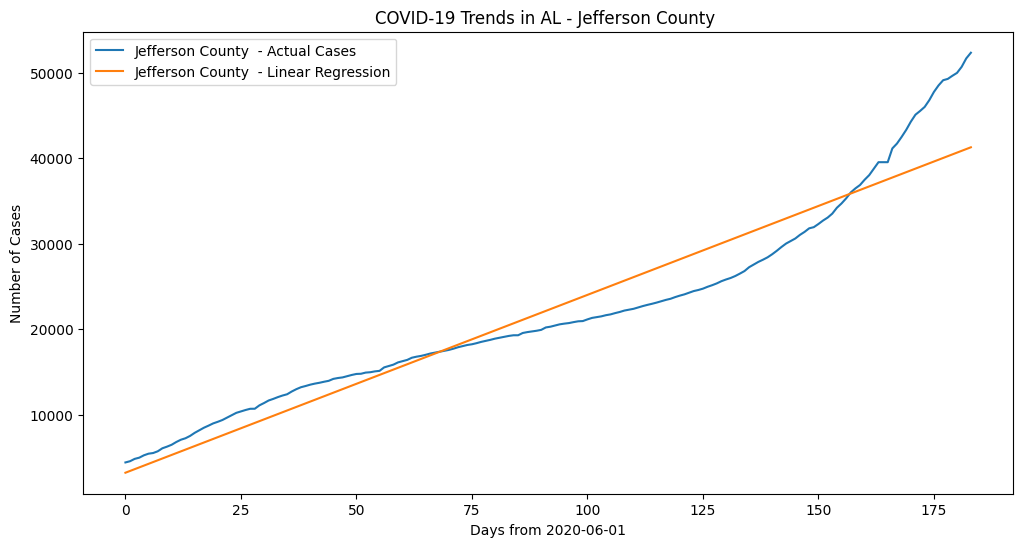

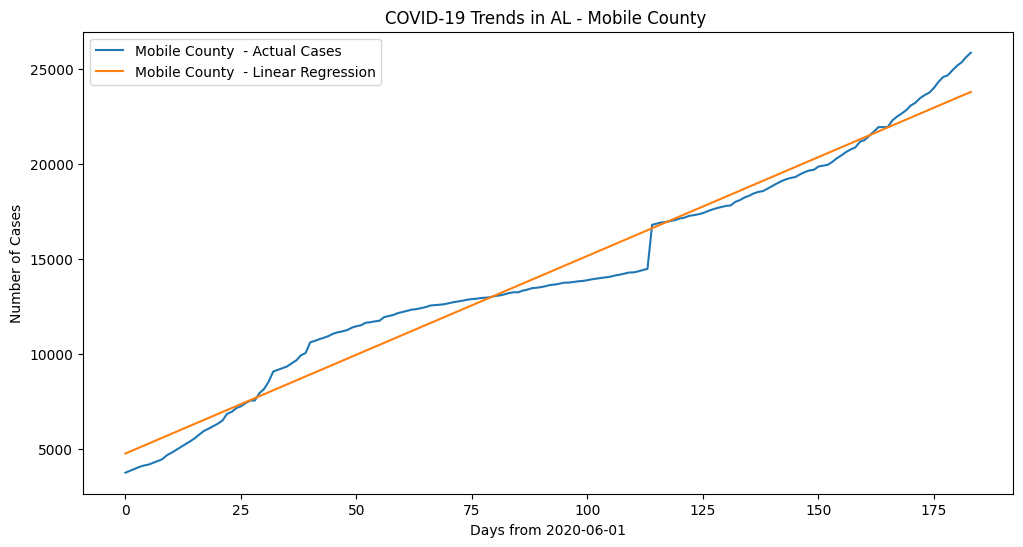

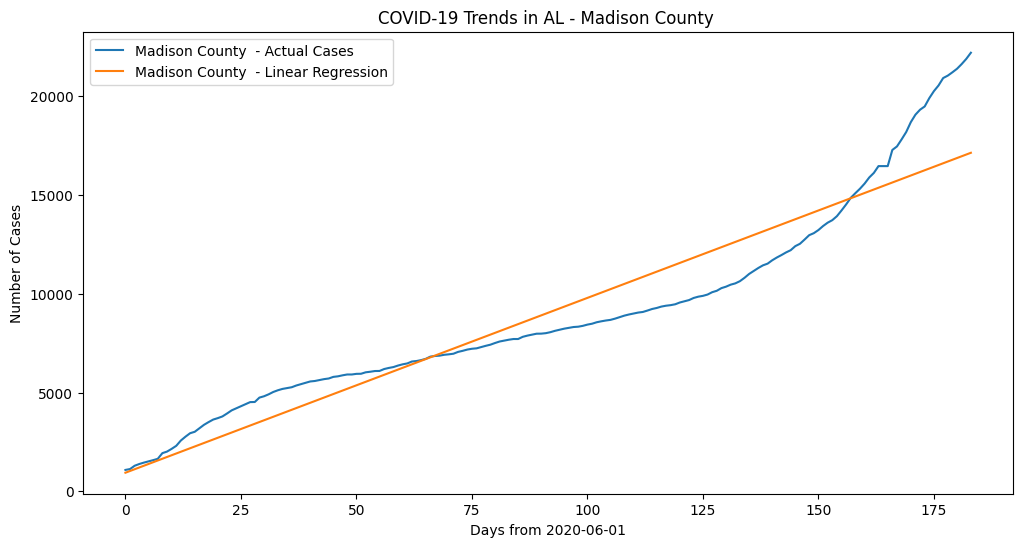

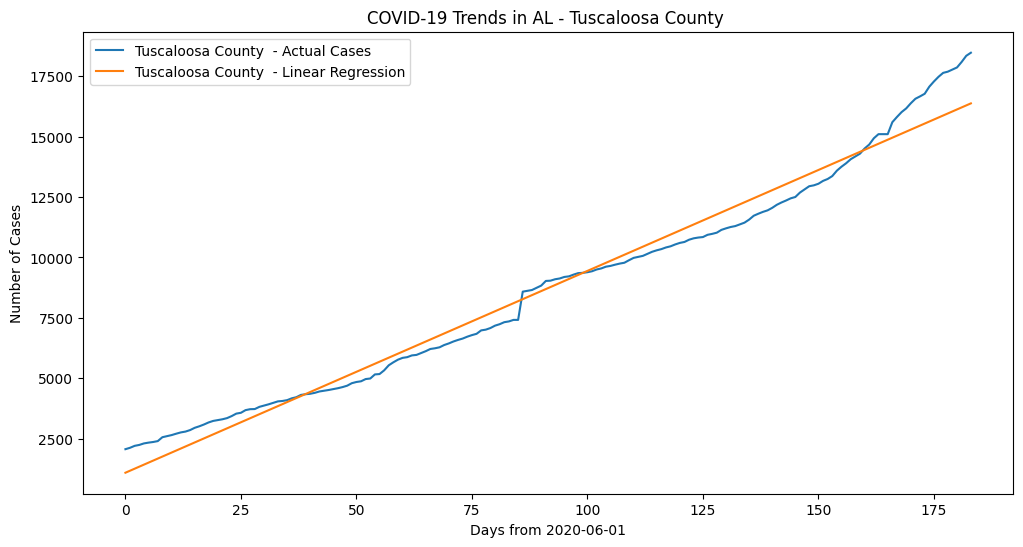

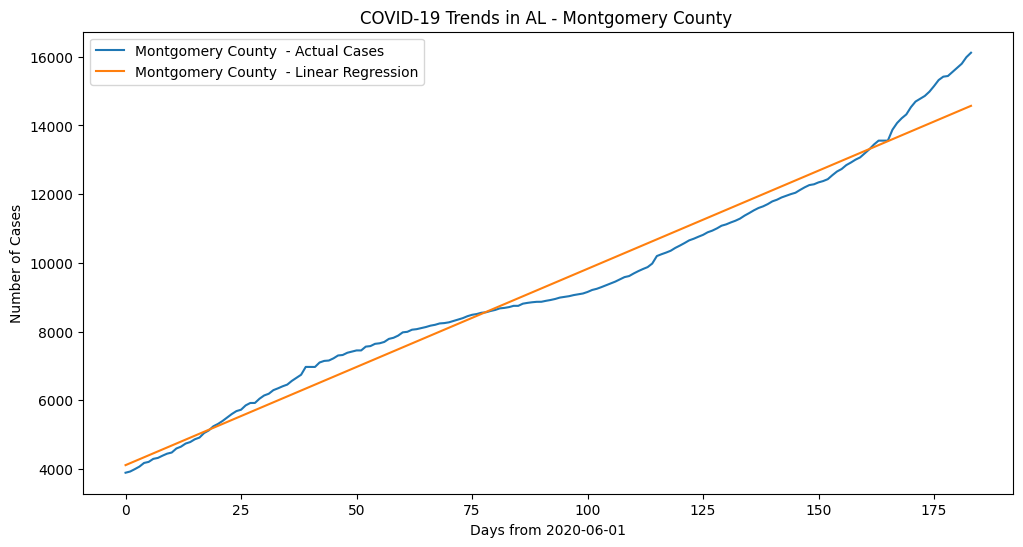

In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
cases_deaths = pd.read_csv("merged_cases_deaths.csv")
selected_state = 'AL'
state_data = cases_deaths[(cases_deaths['State'] == selected_state) & 
                          (cases_deaths['date'] >= '2020-06-01') & 
                          (cases_deaths['date'] <= '2021-01-03')]
top_counties = state_data.groupby('County Name')['cases'].max().nlargest(5).index
for county in top_counties:
    county_data = state_data[state_data['County Name'] == county]
    X = np.arange(len(county_data)).reshape(-1, 1)
    y_cases = county_data['cases']
    linear_reg = LinearRegression()
    linear_reg.fit(X, y_cases)
    linear_pred_cases = linear_reg.predict(X)
    plt.figure(figsize=(12, 6))
    plt.plot(X, y_cases, label=f"{county} - Actual Cases")
    plt.plot(X, linear_pred_cases, label=f"{county} - Linear Regression")
    plt.xlabel("Days from 2020-06-01")
    plt.ylabel("Number of Cases")
    plt.title(f"COVID-19 Trends in {selected_state} - {county}")
    plt.legend()
    plt.show()


## plot2 prediction path (forecast 1 week).

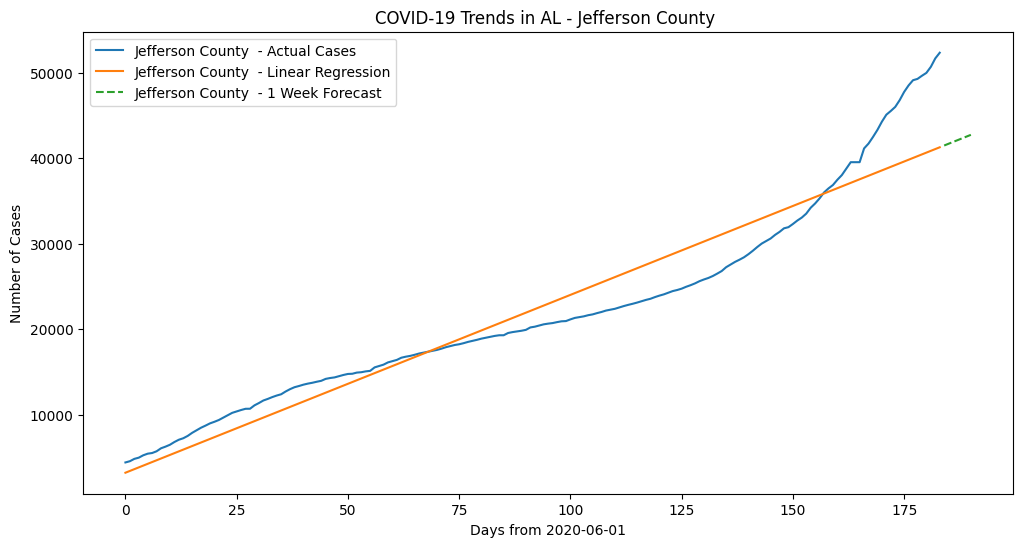

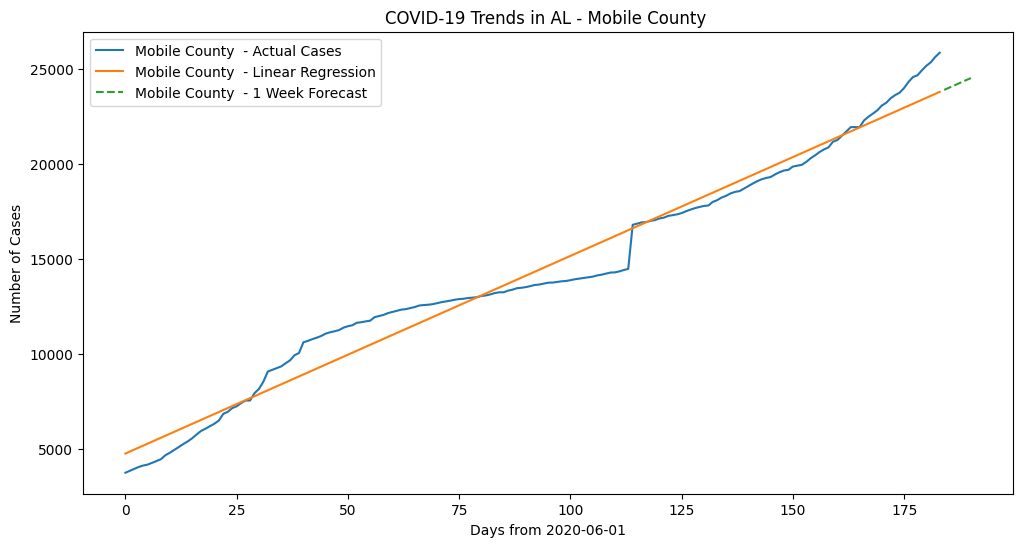

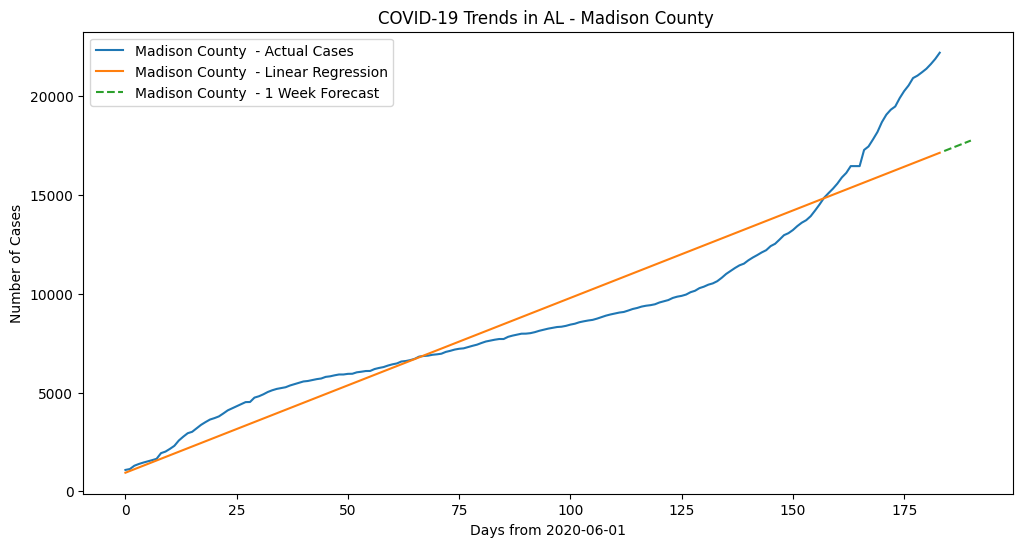

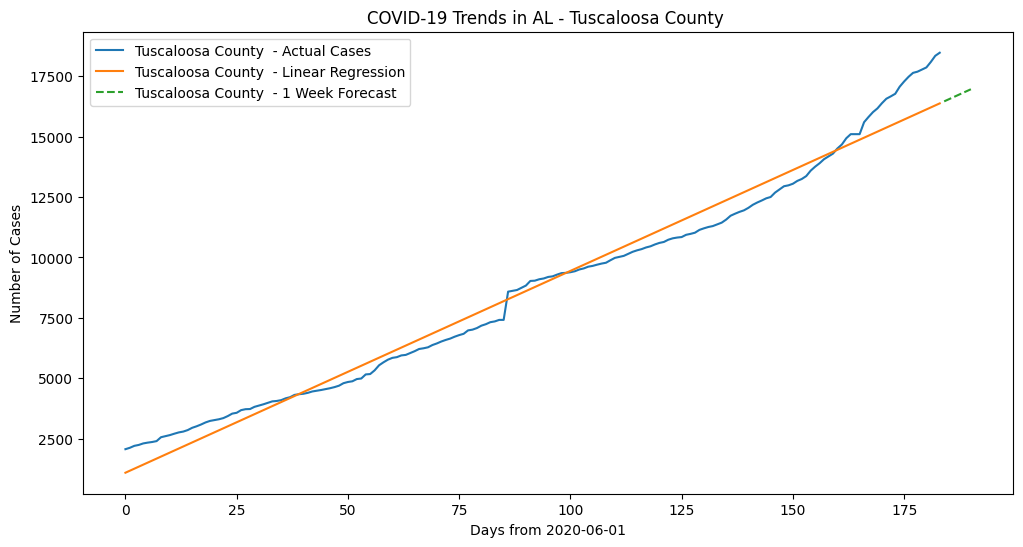

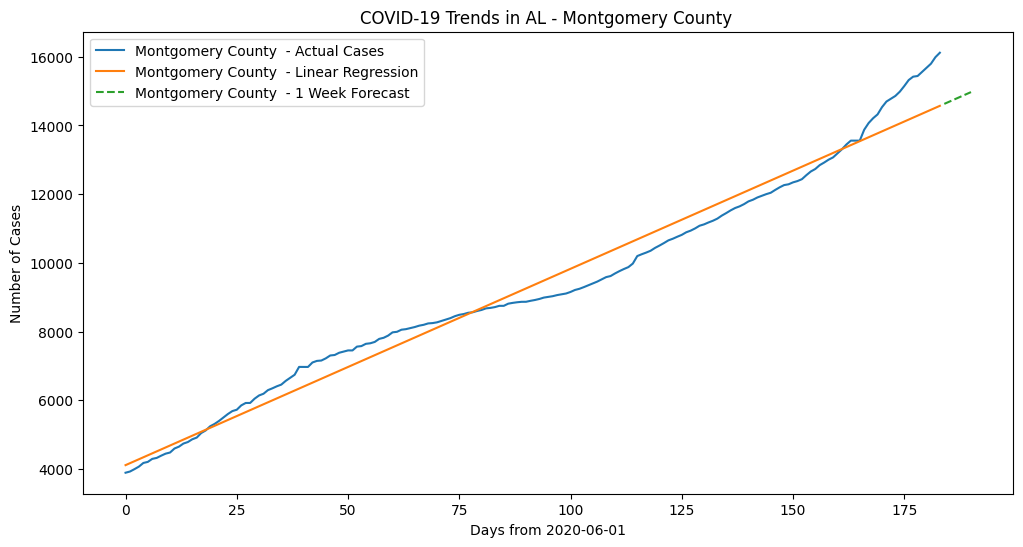

In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
cases_deaths = pd.read_csv("merged_cases_deaths.csv")
selected_state = 'AL'
state_data = cases_deaths[(cases_deaths['State'] == selected_state) & 
                          (cases_deaths['date'] >= '2020-06-01') & 
                          (cases_deaths['date'] <= '2021-01-03')]
top_counties = state_data.groupby('County Name')['cases'].max().nlargest(5).index
extended_dates = pd.date_range(start='2020-06-01', end='2021-01-10')
for county in top_counties:
    county_data = state_data[state_data['County Name'] == county]
    X = np.arange(len(county_data)).reshape(-1, 1)
    y_cases = county_data['cases']
    linear_reg = LinearRegression()
    linear_reg.fit(X, y_cases)
    linear_pred_cases = linear_reg.predict(X)
    X_with_intercept = sm.add_constant(X)
    model = sm.OLS(y_cases, X_with_intercept)
    results = model.fit()
    X_extended = np.arange(len(county_data), len(county_data) + 7).reshape(-1, 1)
    X_extended_with_intercept = sm.add_constant(X_extended)
    linear_pred_extended = results.predict(X_extended_with_intercept)
    plt.figure(figsize=(12, 6))
    plt.plot(X, y_cases, label=f"{county} - Actual Cases")
    plt.plot(X, linear_pred_cases, label=f"{county} - Linear Regression")
    plt.plot(X_extended, linear_pred_extended, linestyle='dashed', label=f"{county} - 1 Week Forecast")
    plt.xlabel("Days from 2020-06-01")
    plt.ylabel("Number of Cases")
    plt.title(f"COVID-19 Trends in {selected_state} - {county}")
    plt.legend()
    plt.show()


## plot 3confidence intervals (error in prediction).

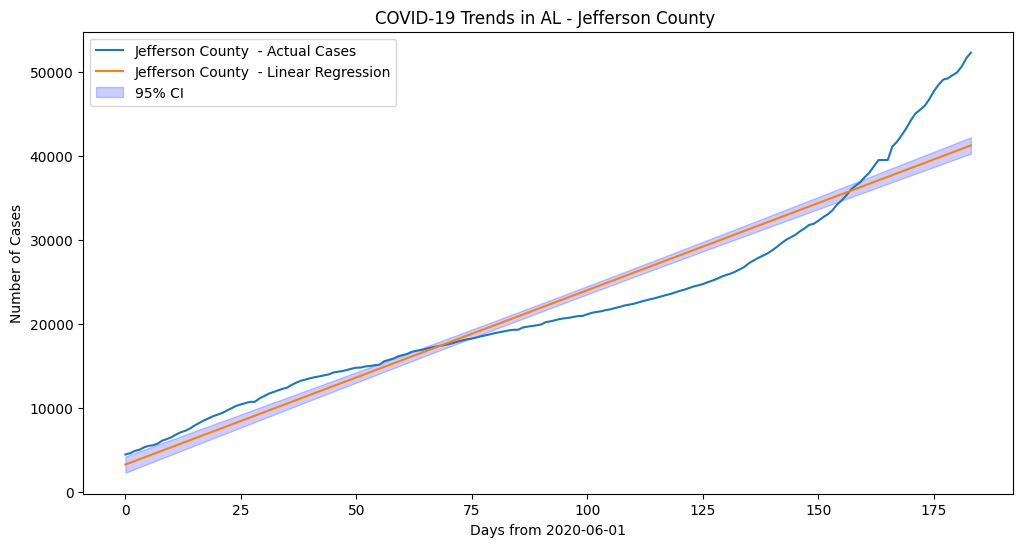

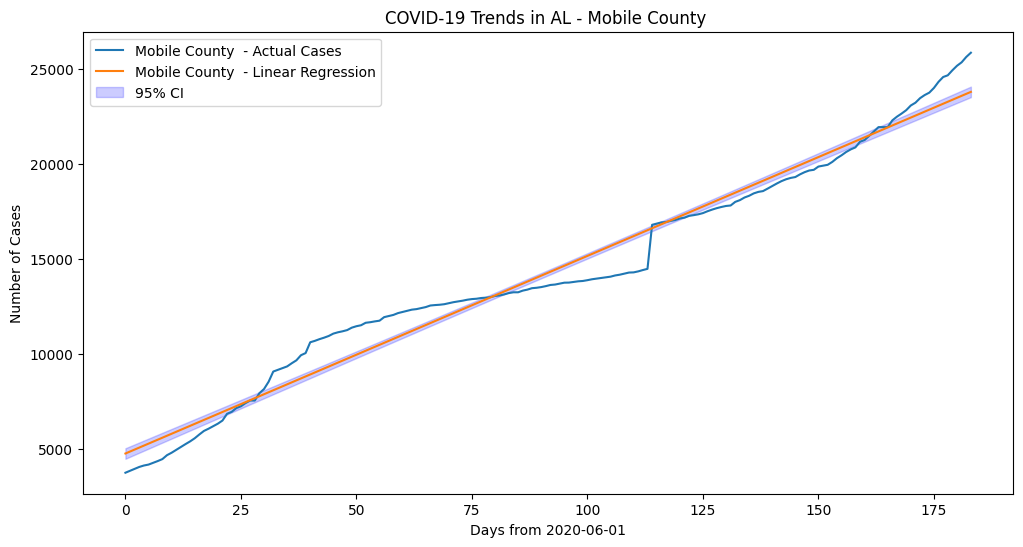

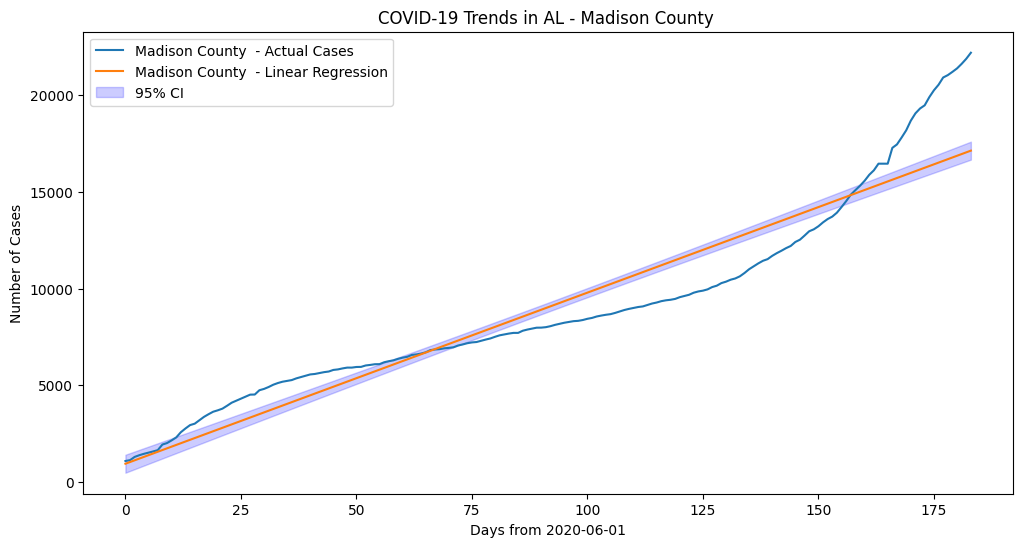

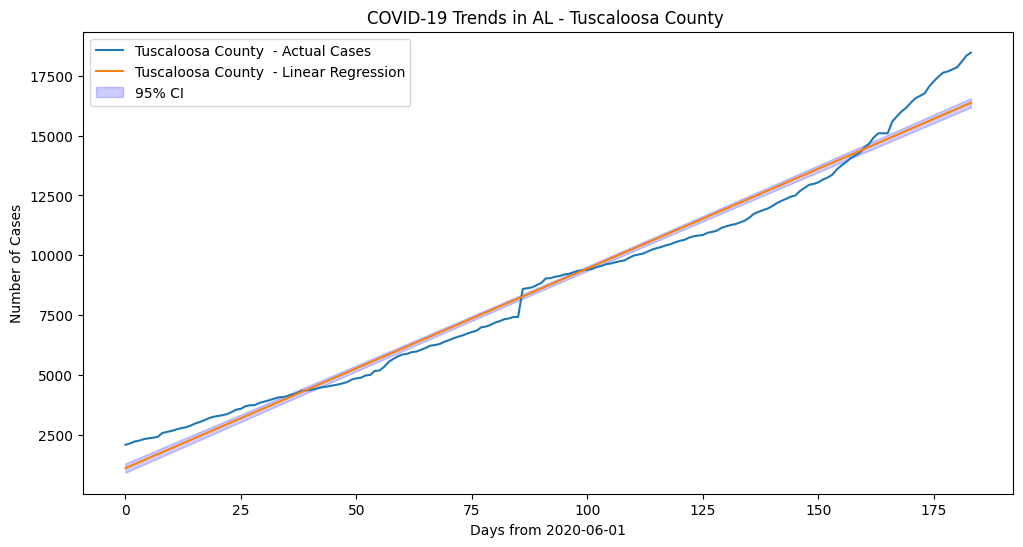

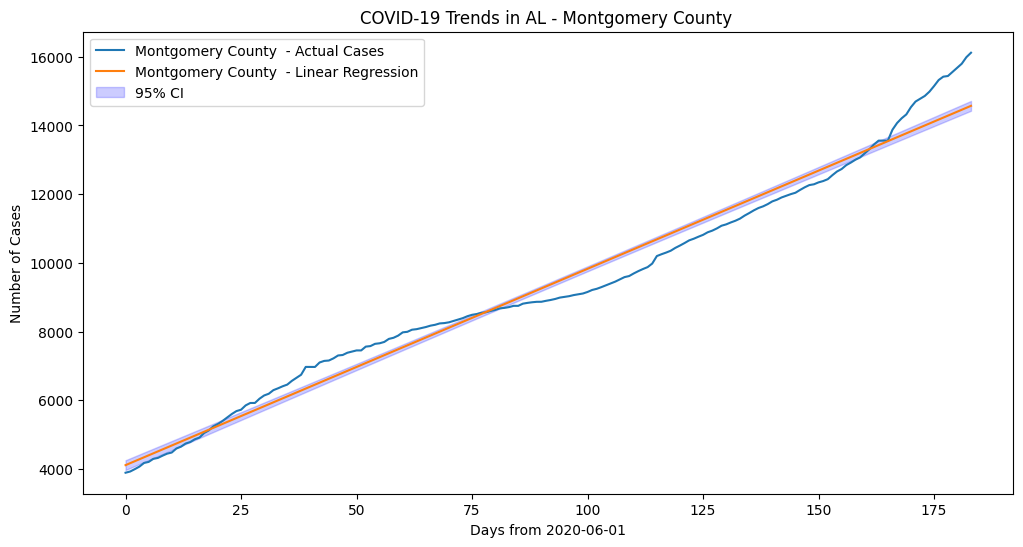

In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
cases_deaths = pd.read_csv("merged_cases_deaths.csv")
selected_state = 'AL'
state_data = cases_deaths[(cases_deaths['State'] == selected_state) & 
                          (cases_deaths['date'] >= '2020-06-01') & 
                          (cases_deaths['date'] <= '2021-01-03')]
top_counties = state_data.groupby('County Name')['cases'].max().nlargest(5).index
extended_dates = pd.date_range(start='2020-06-01', end='2021-01-10')
for county in top_counties:
    county_data = state_data[state_data['County Name'] == county]
    X = np.arange(len(county_data)).reshape(-1, 1)
    y_cases = county_data['cases']
    linear_reg = LinearRegression()
    linear_reg.fit(X, y_cases)
    linear_pred_cases = linear_reg.predict(X)
    X_with_intercept = sm.add_constant(X)
    model = sm.OLS(y_cases, X_with_intercept)
    results = model.fit()
    ci = results.get_prediction(X_with_intercept).conf_int()
    X_extended = np.arange(len(county_data), len(county_data) + 7).reshape(-1, 1)
    X_extended_with_intercept = sm.add_constant(X_extended)
    linear_pred_extended = results.predict(X_extended_with_intercept)
    plt.figure(figsize=(12, 6))
    plt.plot(X, y_cases, label=f"{county} - Actual Cases")
    plt.plot(X, linear_pred_cases, label=f"{county} - Linear Regression")
    plt.fill_between(X_with_intercept[:,1], ci[:,0], ci[:,1], color='b', alpha=0.2, label='95% CI')
    plt.xlabel("Days from 2020-06-01")
    plt.ylabel("Number of Cases")
    plt.title(f"COVID-19 Trends in {selected_state} - {county}")
    plt.legend()
    plt.show()
